# Introduction to Predictive Models: Supervised Machine Learning

This module introduces the core ideas of *machine learning*, specifically **supervised** machine learning.

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn

# 3. Supervised Machine Learning

We'll next consider **supervised** machine learning, which learns a function from input features to output classes.

## 3.1 Classification via Decision Trees

We will start with perhaps the simplest (certainly, most explainable) classification algorithm, the *decision tree*.  We'll begin with a very simple example from the slides.

[Text(200.88000000000002, 181.2, 'X[0] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(133.92000000000002, 108.72, 'X[2] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(66.96000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 108.72, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]')]

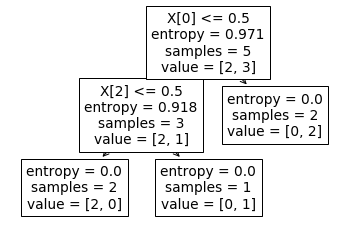

In [13]:
from sklearn import tree
import numpy

# Here's a simple example...  We have 4
# features to predict whether someone is
# going to buy a pet.
X = numpy.array(\
                [[1,0,0,0],\
                 [0,1,1,1],\
                 [0,1,0,0],\
                 [0,0,0,1],\
                 [1,1,0,0]])
# Here is whether they bought the toy
y = [1,1,0,0,1]

clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X, y)

tree.plot_tree(clf)


### 3.1.1 Entropy

A common way of measuring the *information gain* when considering a split is through the notion of *entropy*.

Let's start with an example -- suppose we are trying to predict which students like statistics...

In [14]:
import pandas as pd

input_data = pd.DataFrame([{'major': 'math','likes_stats': False},\
                           {'major': 'math','likes_stats': False},\
                           {'major': 'math','likes_stats': True},\
                           {'major': 'math','likes_stats': True},\
                           {'major': 'engl','likes_stats': False},\
                           {'major': 'stat','likes_stats': True},\
                           {'major': 'stat','likes_stats': True},\
                           {'major': 'engl','likes_stats': False},\
                           ])

input_data

,major,likes_stats
0,math,False
1,math,False
2,math,True
3,math,True
4,engl,False
5,stat,True
6,stat,True
7,engl,False


In [15]:
from math import log2

def prob(term):
  return len(input_data[input_data['major']==term])/len(input_data)

# Here's how to compute the entropy for the dataset
majors = set(input_data['major'])
probs = {}
for major in majors:
  probs[major] = prob(major)

print (probs)

entropy_major = -sum([p * log2(p) for p in probs.values()])
print('Entropy of major: %.2f'%entropy_major)

### Here's built-in Python support...
from scipy.stats import entropy
print ('Entropy of major: %.2f'%entropy([x for x in probs.values()], base=2))
print ('Entropy of likes_stats: %0.2f'%entropy(\
    [len(input_data[input_data['likes_stats']==True])/len(input_data),
     len(input_data[input_data['likes_stats']==False])/len(input_data)],base=2))

{'engl': 0.25, 'stat': 0.25, 'math': 0.5}
Entropy of major: 1.50
Entropy of major: 1.50
Entropy of likes_stats: 1.00


Now let's consider *conditional entropy*... Specifically, the entropy of whether someone likes stats, given their major.

In [16]:
def get_subset_likes_stats(term):
  subset = input_data[input_data['major']==term]['likes_stats']
  return [sum(subset==False)/len(subset), sum(subset==True)/len(subset)]

subsets = {}
for major in majors:
  subsets[major] = get_subset_likes_stats(major)
  print(probs[major],'* entropy(',subsets[major],')')

entropy_likes_stats_given_major = sum([probs[major] * \
                                       entropy(subsets[major],base=2) \
                                        for major in probs.keys()])

entropy_likes_stats_given_major

0.25 * entropy( [1.0, 0.0] )
0.25 * entropy( [0.0, 1.0] )
0.5 * entropy( [0.5, 0.5] )


0.5

Conditional entropy is ultimately useful for measuring information gain, e.g., the Information Gain $IG(likes\_stats | major)$ is equal to $H(likes\_stats) - H(likes\_stats|major)$, which is equal to $1.0 - 0.5$.

### 3.1.2 Decision Trees for Real Data

In [17]:
from sklearn.datasets import load_wine

dataset = load_wine()
dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [18]:
# Here is the table as a dataframe
pd.DataFrame(dataset.data,columns=dataset.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [19]:
# These are the y vector -- the target class (0, 1, 2)
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [0]:
from sklearn.model_selection import train_test_split
import sklearn.metrics

X_train, X_test, y_train, y_test = train_test_split(dataset.data, \
                                                    dataset.target, \
                                                    test_size=0.30)


In [21]:
# Training step, on X_train with y_train
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

# Prediction step, with X_test (and we will validate accuracy
# against y_test)
prediction = clf.predict(X_test)

# Test accuracy, ie Jaccard distance of matched items
accuracy = sklearn.metrics.accuracy_score(prediction,y_test)
print("Accuracy: %.1f%%"% (accuracy*100))

Accuracy: 100.0%


[Text(125.55000000000001, 195.696, 'X[9] <= 3.46\ngini = 0.66\nsamples = 124\nvalue = [40, 49, 35]'),
 Text(83.7, 152.208, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(167.4, 152.208, 'X[6] <= 1.58\ngini = 0.595\nsamples = 85\nvalue = [40, 10, 35]'),
 Text(83.7, 108.72, 'X[10] <= 0.97\ngini = 0.102\nsamples = 37\nvalue = [0, 2, 35]'),
 Text(41.85, 65.232, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]'),
 Text(125.55000000000001, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(251.10000000000002, 108.72, 'X[12] <= 724.5\ngini = 0.278\nsamples = 48\nvalue = [40, 8, 0]'),
 Text(209.25, 65.232, 'X[1] <= 3.92\ngini = 0.198\nsamples = 9\nvalue = [1, 8, 0]'),
 Text(167.4, 21.744, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(251.10000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(292.95, 65.232, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]')]

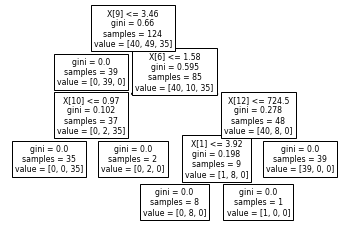

In [22]:
tree.plot_tree(clf)

### 3.1.3 Random Forests

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 20, max_depth=2)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(prediction,y_test)
print("Accuracy: %.1f%%"% (accuracy*100))

Accuracy: 98.1%
